<a href="https://colab.research.google.com/github/kl2217/finite-element/blob/main/variable_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply linear regression to nonlinear relationships through variable transforms

Introduction: Linear Regression for Nonlinear Data
Linear regression is a powerful statistical method for modeling the relationship between variables. However, it assumes a linear relationship between the independent variable(s) (X) and the dependent variable (Y). In many real-world scenarios, this assumption is violated, and the relationship is nonlinear.

Fortunately, we can often apply transformations to the variables to make the relationship linear. This allows us to use linear regression even when the original data exhibits a nonlinear pattern.

Common Nonlinear Relationships and Transformations:

Exponential Relationship:

Form: $$Y = a e^{bx} + \epsilon$$

Transformation: Take the natural logarithm of $$Y$$: $$ \log(Y) = \log(a) + bx + \log(\epsilon) $$ This transforms the relationship into a linear form.

Power Relationship:

Form: $$Y = aX^b + \epsilon$$

Transformation: Take the logarithm of both $$X$$ and $$Y$$: $$ \log(Y) = \log(a) + b \log(X) + \log(\epsilon) $$ This linearizes the relationship between the logarithms of the variables.

Logarithmic Relationship:

Form: $$Y = a + b \log(X) + \epsilon$$

Transformation: No transformation needed for $$Y$$, but consider transforming $$X$$ if it has a wide range of values.
Benefits of Variable Transformations:

Linearizes the relationship, enabling the use of linear regression.
Improves model accuracy and interpretability.
Stabilizes variance and normalizes residuals.
By applying appropriate transformations, we can extend the applicability of linear regression to a broader range of data and gain valuable insights from nonlinear relationships.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           8.38e-27
Time:                        14:03:01   Log-Likelihood:                -90.399
No. Observations:                 100   AIC:                             184.8
Df Residuals:                      98   BIC:                             190.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2668      0.140      9.037      0.0

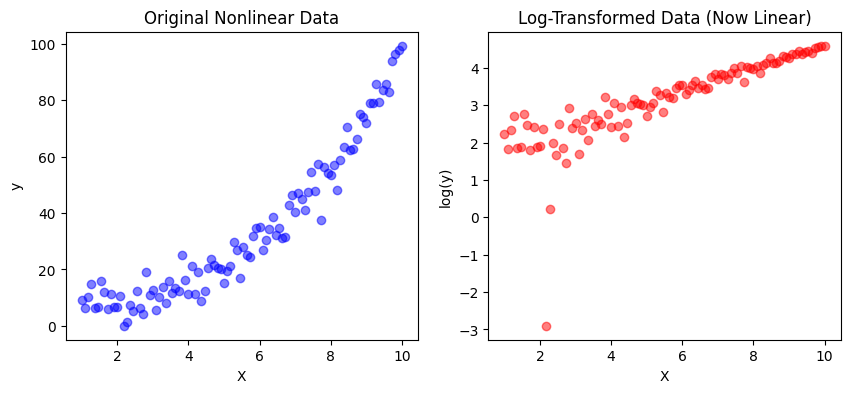

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generating non-linear data
np.random.seed(42)
X = np.linspace(1, 10, 100)
y = 5 * np.exp(0.3 * X) + np.random.normal(0, 5, 100)  # Exponential relationship

# Transforming the dependent variable (log transformation)
y_log = np.log(y)

# Fitting linear regression on transformed data
X = sm.add_constant(X)  # Adding intercept
model = sm.OLS(y_log, X).fit()

# Display model summary
print(model.summary())

# Plot original vs transformed
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:,1], y, color='blue', alpha=0.5)
plt.title("Original Nonlinear Data")
plt.xlabel("X")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.scatter(X[:,1], y_log, color='red', alpha=0.5)
plt.title("Log-Transformed Data (Now Linear)")
plt.xlabel("X")
plt.ylabel("log(y)")

plt.show()


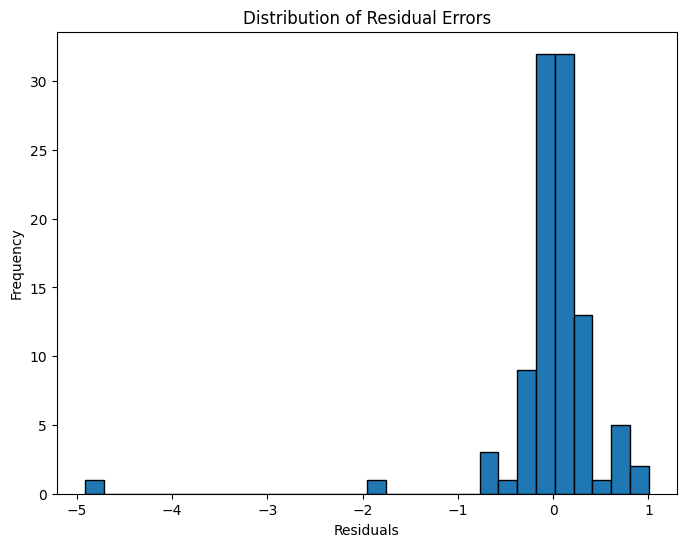

In [3]:
# prompt: plot error distribution

import matplotlib.pyplot as plt

# Assuming 'model' is the fitted OLS model from the previous code
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residual Errors')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
